# Decision Tree

Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Bank Marketing Campaign Dataset.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


# EDA

In [3]:
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32940,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,no
32941,28,blue-collar,single,basic.9y,no,yes,no,cellular,apr,thu,315,1,2,1,success,yes
32942,44,entrepreneur,married,professional.course,no,yes,no,telephone,nov,mon,291,3,999,0,nonexistent,no
32943,47,admin.,married,basic.9y,no,yes,no,telephone,nov,fri,64,3,999,0,nonexistent,no
32944,29,blue-collar,married,basic.6y,no,no,no,cellular,may,thu,16,7,999,0,nonexistent,no
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [5]:
df.shape


(32950, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [7]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Making categorical and numerical col

In [9]:
categorical_col=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']
numerical_col=['age', 'pdays','previous', 'poutcome']


Selecting the data type

In [10]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns


Calculating the Mean, Median and Mode

In [11]:
for i in numerical_col:
    print(f"{i} | Mean:{df[i].mean():.2f} | Median:{df[i].median()} | Mode:{df[i].mode()[0]}")

age | Mean:40.01 | Median:38.0 | Mode:31
duration | Mean:258.13 | Median:180.0 | Mode:90
campaign | Mean:2.56 | Median:2.0 | Mode:1
pdays | Mean:962.05 | Median:999.0 | Mode:999
previous | Mean:0.17 | Median:0.0 | Mode:0


checking the unique elements in columns from categorical col

In [12]:
for i in categorical_col:
  print(f"{i} | {df[i].unique()}")

job | ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital | ['married' 'divorced' 'single' 'unknown']
education | ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default | ['unknown' 'no' 'yes']
housing | ['no' 'yes' 'unknown']
loan | ['no' 'yes' 'unknown']
contact | ['cellular' 'telephone']
month | ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week | ['wed' 'mon' 'tue' 'fri' 'thu']


# Data Visulization

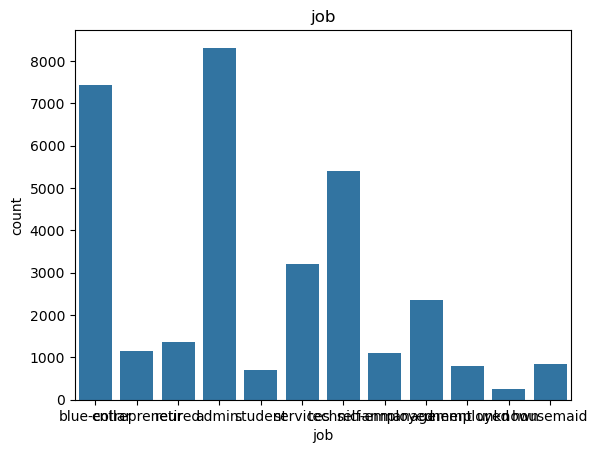

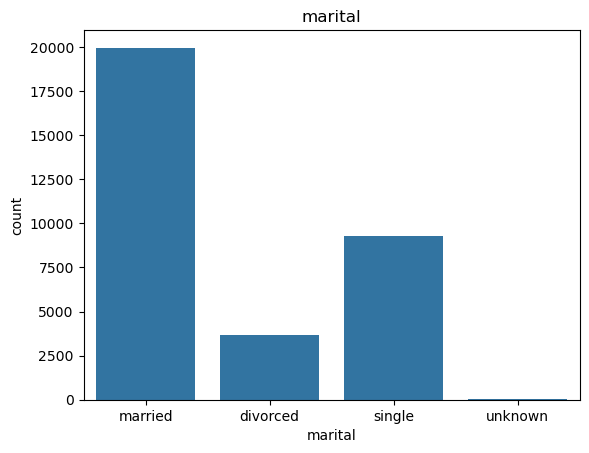

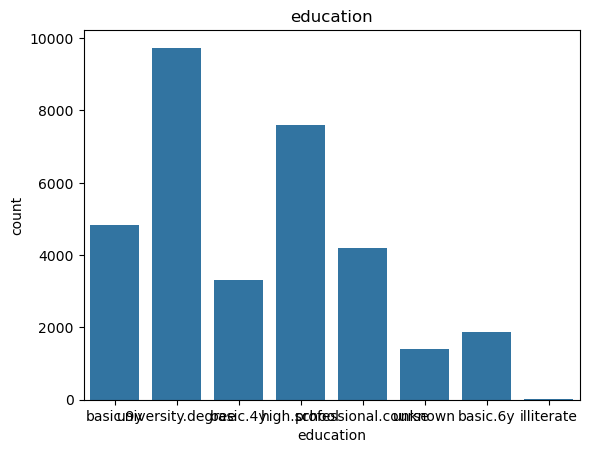

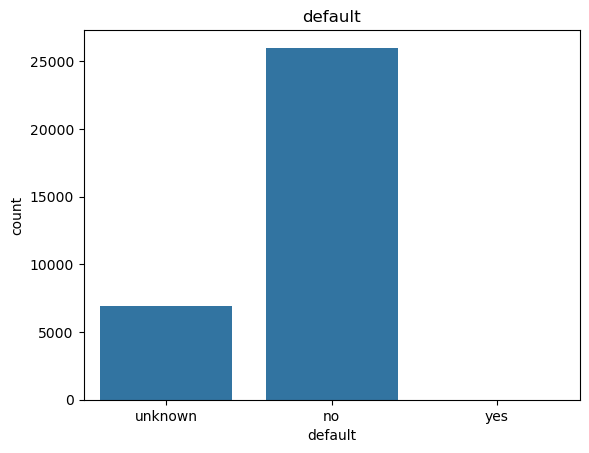

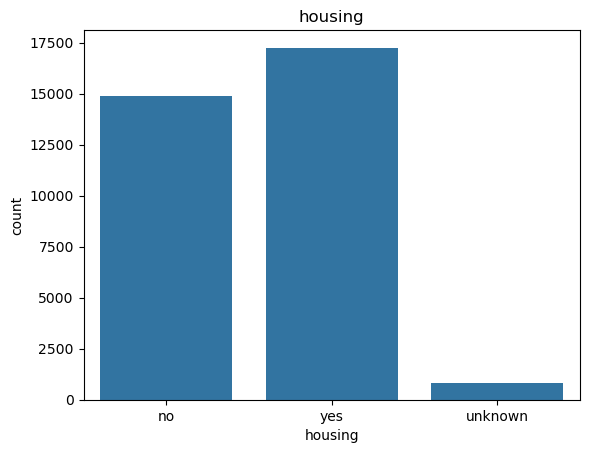

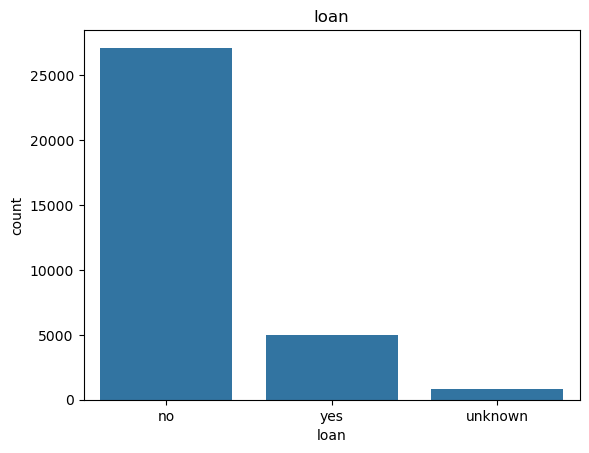

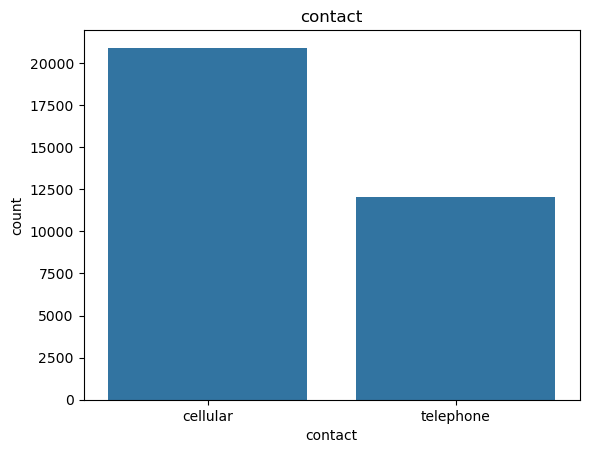

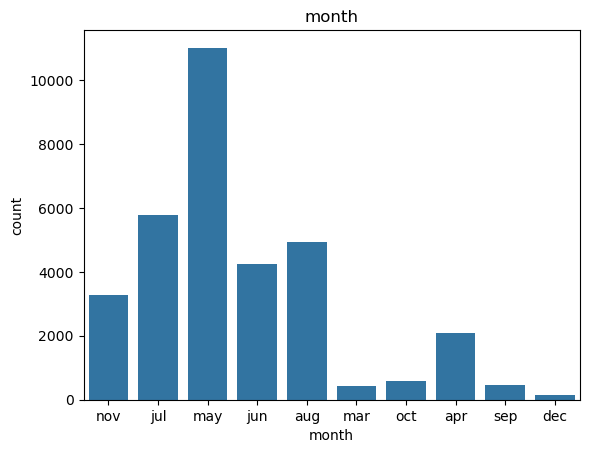

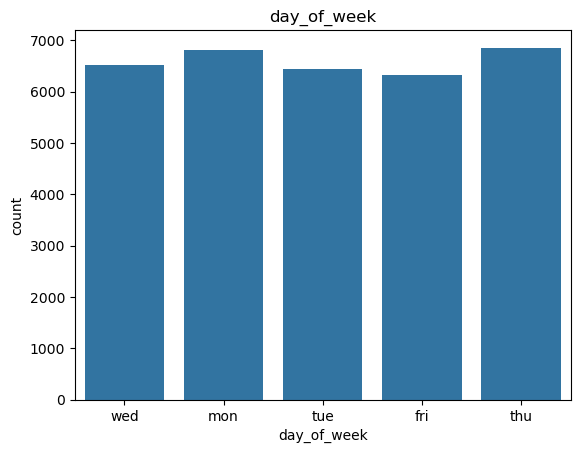

In [13]:
for i in categorical_col:
    plt.title(i);
    sns.countplot(x=i,data=df)
    plt.show()

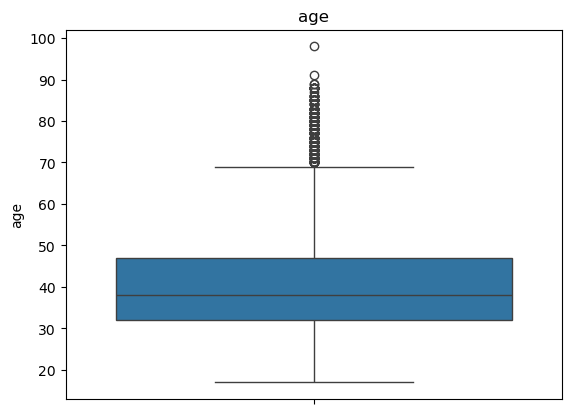

In [ ]:
plt.title('age')
sns.boxplot(y='age',data=df)

plt.show()

In [15]:
plt.title('payday')
sns.countplot(x='pdays',data=df)


<Axes: title={'center': 'payday'}, xlabel='pdays', ylabel='count'>

In [16]:
sns.displot(df['pdays'])

In [17]:
sns.boxplot(y='campaign',data=df)

<Axes: xlabel='pdays', ylabel='Count'>

In [18]:
sns.boxplot(y='duration',data=df)

<Axes: xlabel='pdays', ylabel='Count'>

numbers of NULL values 

In [19]:
df[numerical_col].isnull().sum()


age         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

Numbers of unknown values 

In [20]:
(df[categorical_col] == "unknown").sum()


job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
dtype: int64

In [21]:
for i in categorical_col:
    if (df[i] == "unknown").sum() > 0:
        mode_val = df[i].mode()[0]
        df.loc[df[i] == "unknown", i] = mode_val


In [22]:
df = pd.get_dummies(df, drop_first=True,dtype=int)

In [23]:
df.head()


,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [24]:
print(df.shape)

(32950, 43)


Training of data 

choosing DecisionTreeClassifier Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
X = df.drop('y_yes', axis=1)
y = df['y_yes']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
dt = DecisionTreeClassifier(
    criterion="gini",     
    max_depth=5,          
    min_samples_split=10,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [29]:
y_pred = dt.predict(X_test)


Calculating accuracy 

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9045523520485584

Confusion Matrix:
 [[5685  163]
 [ 466  276]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5848
           1       0.63      0.37      0.47       742

    accuracy                           0.90      6590
   macro avg       0.78      0.67      0.71      6590
weighted avg       0.89      0.90      0.89      6590



sort the columns according to thier weight in data set

In [31]:
df.corr(numeric_only=True)["y_yes"].sort_values(ascending=False)


y_yes                            1.000000
duration                         0.400752
poutcome_success                 0.315919
previous                         0.229759
month_mar                        0.141027
month_oct                        0.136331
month_sep                        0.126049
job_retired                      0.093470
job_student                      0.090440
month_dec                        0.081614
education_university.degree      0.060438
marital_single                   0.057054
age                              0.028673
job_unemployed                   0.016298
day_of_week_thu                  0.011946
housing_yes                      0.009753
day_of_week_tue                  0.005336
education_illiterate             0.005218
day_of_week_wed                  0.004591
job_management                   0.001801
education_professional.course    0.000215
loan_yes                        -0.000499
job_self-employed               -0.002571
default_yes                     -0

In [32]:
importance = pd.Series(
    dt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)


Although duration was the most important feature, removing it resulted in only marginal changes in accuracy and recall. This indicates that the model relies on multiple predictors and that removing duration avoids data leakage without significantly degrading performance 